In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_image, train_result),(test_image, test_result) = datasets.cifar10.load_data()

train_image, test_image = train_image/255.0, test_image/255.0

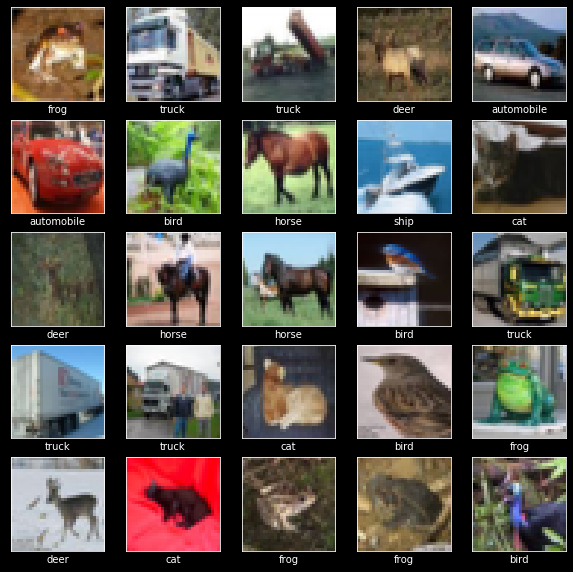

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_result[i][0]])
    
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(63, (3,3), activation = "relu"))

model.summary()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
__________

In [7]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_image, train_result, epochs=3, validation_data=(test_image, test_result))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 125s 2ms/sample - loss: 1.5213 - acc: 0.4502 - val_loss: 2.1160 - val_acc: 0.3435
Epoch 2/3
50000/50000 [==============================] - 131s 3ms/sample - loss: 1.1228 - acc: 0.6064 - val_loss: 1.1130 - val_acc: 0.6047
Epoch 3/3
50000/50000 [==============================] - 132s 3ms/sample - loss: 0.9519 - acc: 0.6683 - val_loss: 0.9903 - val_acc: 0.6568


10000/10000 [==============================] - 7s 694us/sample - loss: 0.9903 - acc: 0.6568


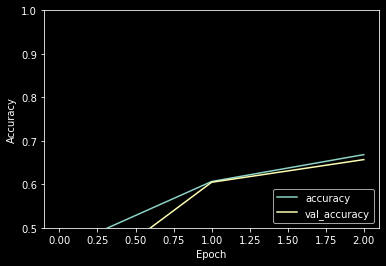

In [8]:
# history['accuracy']

plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_image, test_result, verbose=1)
